In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv("/content/AB_NYC_2019.csv")
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [57]:
data.tail(3)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## Airbnb listings dataset for New York City.

### Dataset Overview
* Each row in the dataset represents a unique Airbnb listing. The columns contain various details about the listing, the host, the location, pricing, availability, and user engagement (like reviews).
### Column-wise Explanation

**Column** :   **NameDescription**
* **id**	: Unique identifier for the Airbnb listing.
* **name** :	Title or name of the listing created by the host.
* **host_id**	: Unique ID assigned to the host.
* **host_name** : 	Name of the host.
* **neighbourhood_group** :	One of the 5 NYC boroughs (e.g., Brooklyn, Manhattan, etc.).
* **neighbourhood** :	Specific neighborhood where the listing is located.
* **latitude**:	Geographic latitude of the listing.
* **longitude**	:Geographic longitude of the listing.
* **room_type**	:Type of room offered (e.g., Entire home/apt, Private room, Shared room).
* **price**:	Price per night in USD.
* **minimum_nights**:	Minimum number of nights a guest must book.
* **number_of_reviews**	:Total number of reviews this listing has received.
* **last_review**:	Date of the most recent review.
* **reviews_per_month**:	Average number of reviews received per month.
* **calculated_host_listings_count**	: Number of listings the host has on Airbnb.
* **availability_365**:	Number of days per year the listing is available (0–365).

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [59]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [60]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [61]:
data.index

RangeIndex(start=0, stop=48895, step=1)

In [62]:
import sys
sys.getsizeof(data)

24647874

In [63]:
data.nunique()

,0
id,48895
name,47905
host_id,37457
host_name,11452
neighbourhood_group,5
neighbourhood,221
latitude,19048
longitude,14718
room_type,3
price,674


In [64]:
data.shape

(48895, 16)

In [65]:
data.index = data['name']


In [66]:
data.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
name,,,,,,,,,,,,,,,,
Clean & quiet apt home by the park,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
Skylit Midtown Castle,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
THE VILLAGE OF HARLEM....NEW YORK !,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
Cozy Entire Floor of Brownstone,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [67]:
data.iloc[8]

,Cozy Clean Guest Room - Family Apt
id,5203
name,Cozy Clean Guest Room - Family Apt
host_id,7490
host_name,MaryEllen
neighbourhood_group,Manhattan
neighbourhood,Upper West Side
latitude,40.80178
longitude,-73.96723
room_type,Private room
price,79


In [68]:
data.reset_index(inplace = True , drop = True)
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [69]:
data['availability_365'].value_counts()

,count
availability_365,
0,17533
365,1295
364,491
1,408
89,361
...,...
195,26
183,24
196,24


In [70]:
data['name'].value_counts()

,count
name,
Hillside Hotel,18
Home away from home,17
New york Multi-unit building,16
Brooklyn Apartment,12
Private Room,11
...,...
Spacious Modern Alcove Studio in a Luxury Building,1
Artist's Room in Large Apartment,1
Modern Oasis in Central Park Slope,1


In [71]:
data['reviews_per_month'].value_counts()

,count
reviews_per_month,
0.02,919
0.05,893
1.00,893
0.03,804
0.16,667
...,...
7.85,1
7.29,1
10.37,1


In [72]:
data['room_type'].value_counts()

,count
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


In [73]:
Cat = data.select_dtypes("object").columns
Cat

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [74]:
num = data.select_dtypes("number").columns
num

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [75]:
# id is unique vaiable , dont contribute any data analysis, so drop it.
data.drop(columns = ['id'],inplace = True)
data.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [76]:
# handling missing values
data.isnull().sum()

,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


* In this result, we see that 'last_review' (10052 missing values) and 'reviews_per_month' (10052 missing values) have too many missing values, so we need to drop them.

In [77]:
data.drop(columns = ['last_review' , 'reviews_per_month'], inplace = True)
data.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365


In [78]:
data.rename(columns={'name' : 'Property_name'},inplace=True)
data.head(3)

,Property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365


In [79]:
data.isnull().sum()

,0
Property_name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Property_name                   48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [81]:
data['Property_name'] = data['Property_name'].fillna(data['Property_name'].mode()[0])
data['host_name'] = data['host_name'].fillna(data['host_name'].mode()[0])
data.isnull().sum()

,0
Property_name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


## Data Visualization

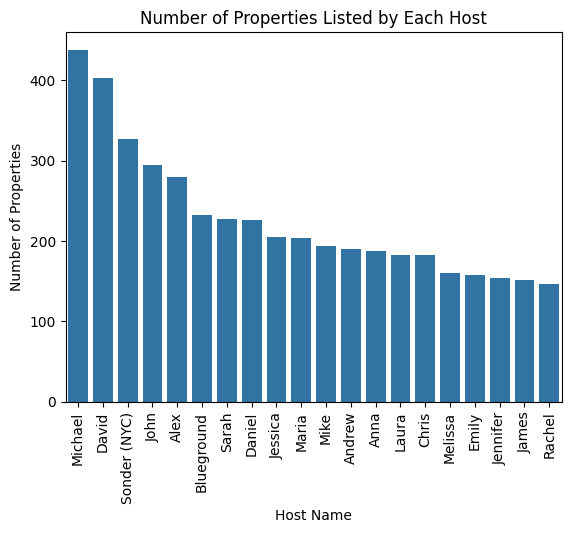

In [82]:
# univariate analysis
top_hosts = data.groupby('host_name')['Property_name'].count().sort_values(ascending=False)
top_hosts = top_hosts.head(20)
sns.barplot(x = top_hosts.index ,y= top_hosts.values )
plt.xlabel('Host Name')
plt.ylabel('Number of Properties')
plt.title('Number of Properties Listed by Each Host')
plt.xticks(rotation=90)
plt.show()


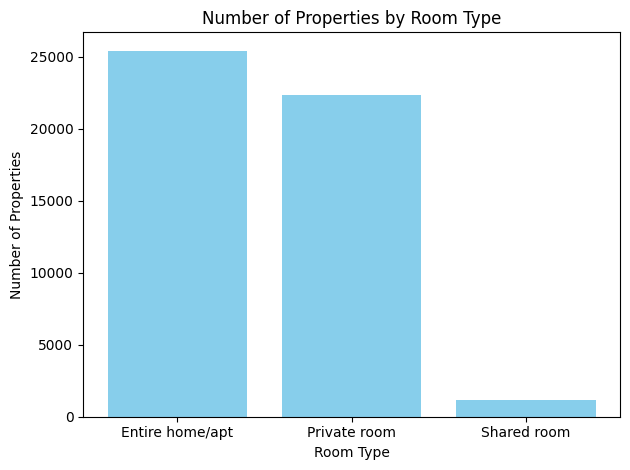

In [83]:

room_type = data.groupby('room_type')['Property_name'].count().sort_values(ascending=False)
plt.bar(room_type.index, room_type.values, color='skyblue')
plt.xlabel('Room Type')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by Room Type')
plt.tight_layout()
plt.show()

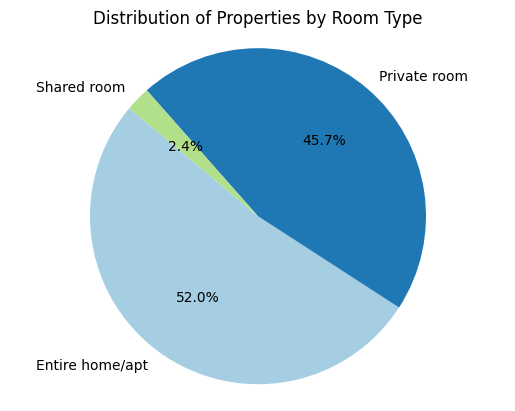

In [84]:
room_type = data.groupby('room_type')['Property_name'].count().sort_values(ascending=False)
plt.pie(room_type.values, labels=room_type.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Properties by Room Type')
plt.axis('equal')  # Ensures the pie chart is a perfect circle
plt.show()

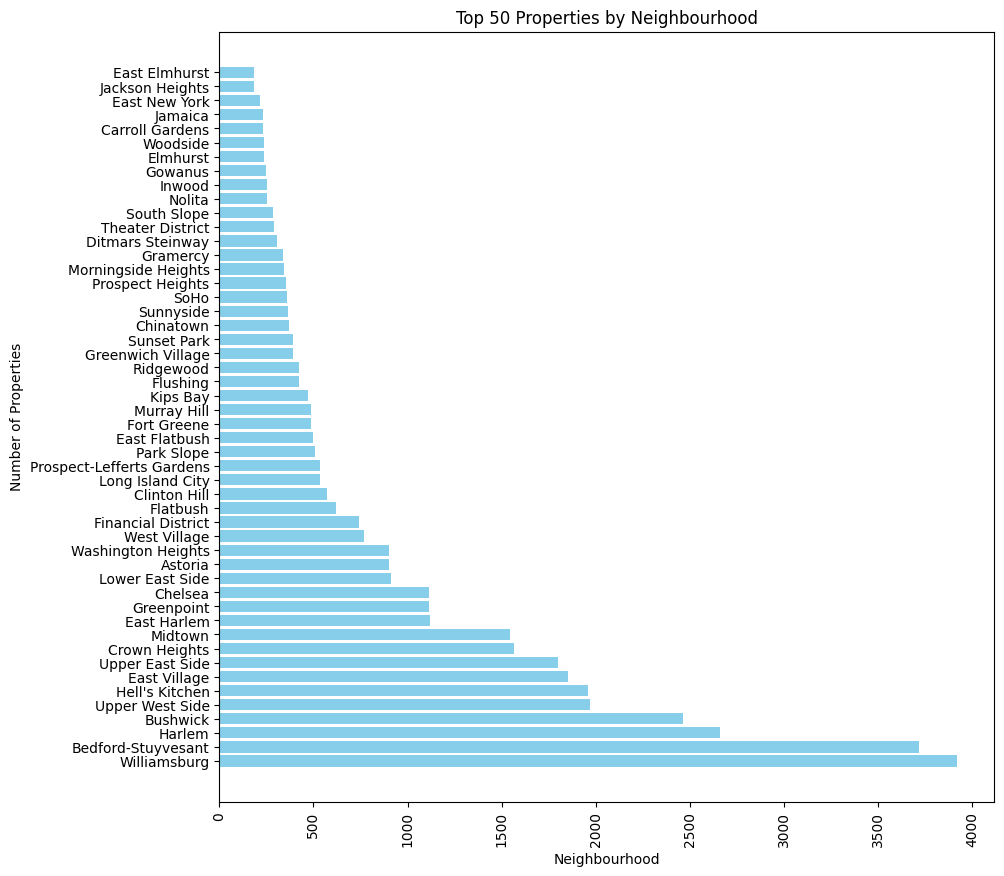

In [85]:
room_type = data.groupby('neighbourhood')['Property_name'].count().sort_values(ascending=False).head(50)
plt.figure(figsize = (10,10))
plt.barh(room_type.index, room_type.values, color='skyblue')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Properties')
plt.title('Top 50 Properties by Neighbourhood')
plt.xticks(rotation = 90)
plt.show()

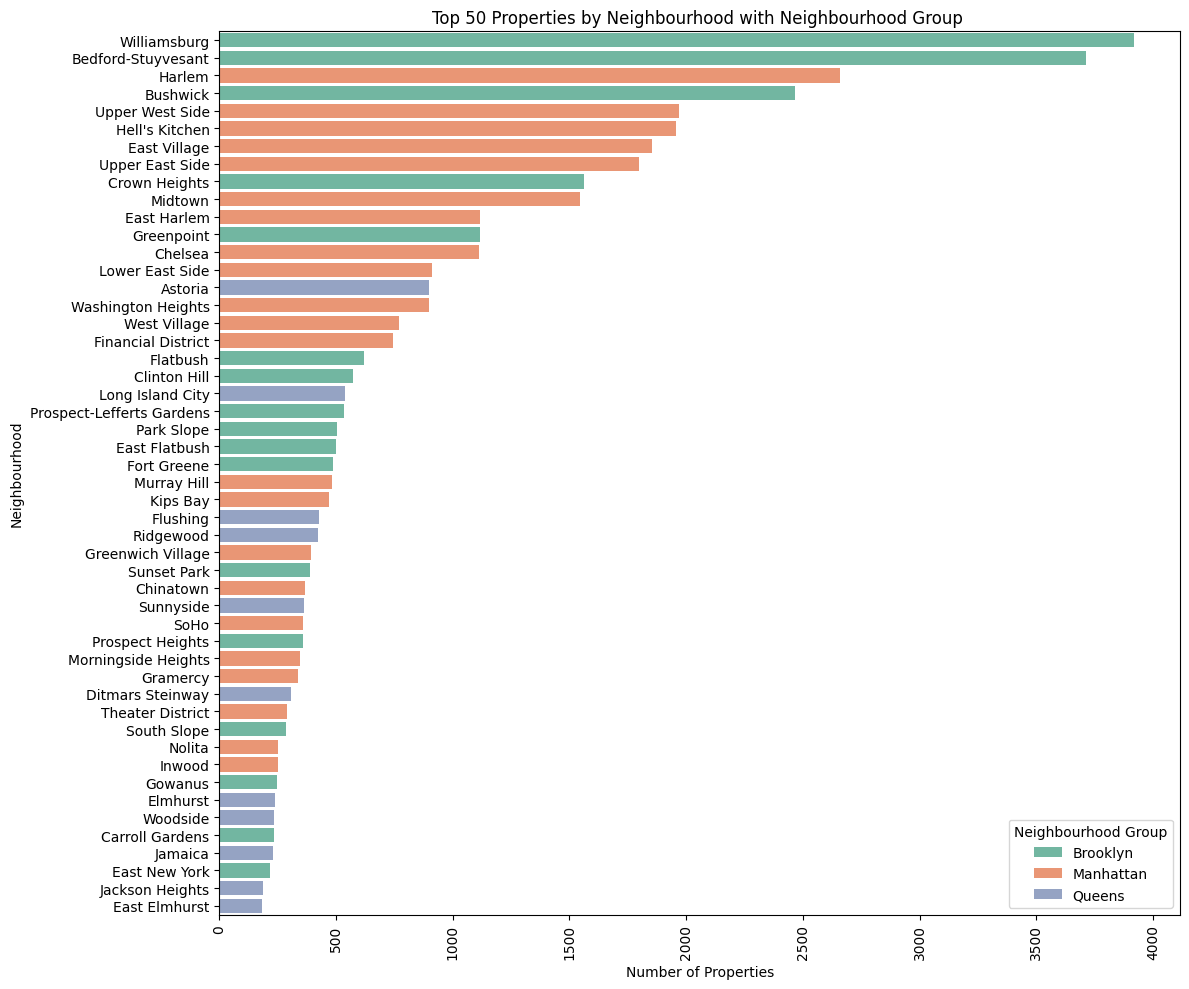

In [86]:
# Grouping data
room_type = data.groupby(['neighbourhood', 'neighbourhood_group'])['Property_name'].count().reset_index(name='Property_count')
# Sort values by the number of properties
room_type_sorted = room_type.sort_values(by='Property_count', ascending=False).head(50)
# Plotting the barplot
plt.figure(figsize=(12, 10))
sns.barplot(x='Property_count', y='neighbourhood', data=room_type_sorted, hue='neighbourhood_group', palette='Set2')
# Add labels and title
plt.xlabel('Number of Properties')
plt.ylabel('Neighbourhood')
plt.title('Top 50 Properties by Neighbourhood with Neighbourhood Group ')
plt.legend(title="Neighbourhood Group")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

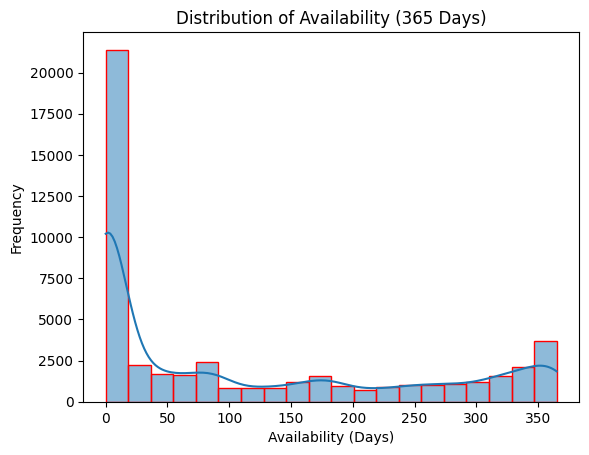

In [87]:
sns.histplot(data['availability_365'], bins=20, edgecolor='red',kde= True)
plt.title('Distribution of Availability (365 Days)')
plt.xlabel('Availability (Days)')
plt.ylabel('Frequency')
plt.show()

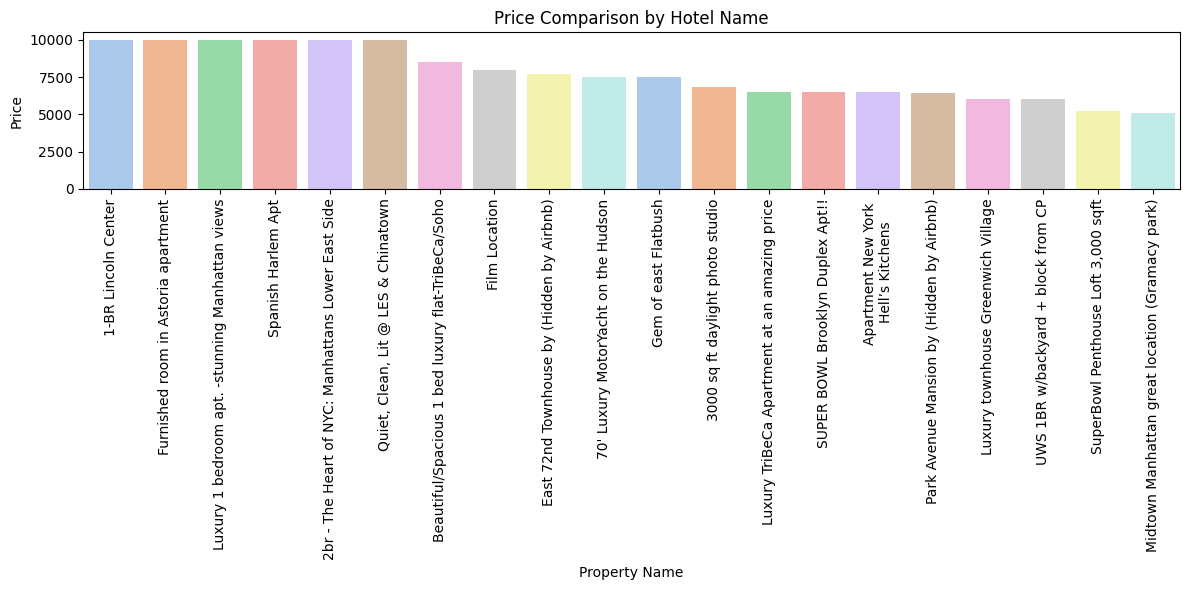

In [88]:
# Sort by price if needed
data_sorted = data.sort_values('price', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x='Property_name', y='price', data=data_sorted, palette='pastel',hue ='Property_name' )
plt.xticks(rotation=90)
plt.title('Price Comparison by Hotel Name')
plt.xlabel('Property Name')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [89]:
data['price_group'] = pd.qcut(data['price'], q=3, labels=['Cheap', 'Medium', 'Costly'])
data

,Property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_group
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,Medium
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,Costly
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,Medium
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,Medium
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,Cheap
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,Cheap
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,Medium
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2,Cheap


In [90]:
data['price_group'].value_counts()

,count
price_group,
Cheap,17098
Medium,16859
Costly,14938


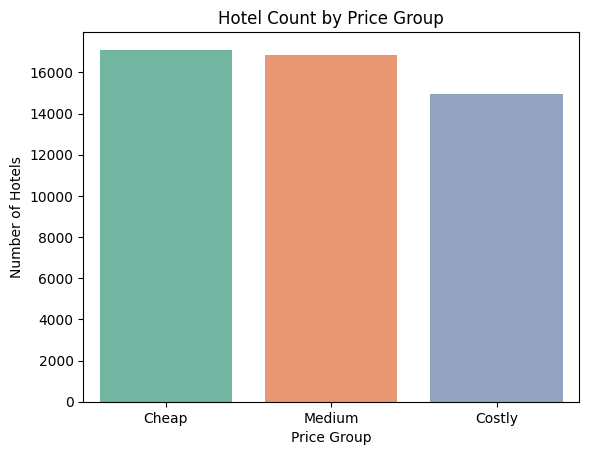

In [91]:
sns.countplot(x='price_group', data=data, palette='Set2',hue ='price_group' )
plt.title('Hotel Count by Price Group')
plt.xlabel('Price Group')
plt.ylabel('Number of Hotels')
plt.show()

<ipython-input-92-b03f1b01dde9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_group = data.groupby('price_group')['number_of_reviews'].count().reset_index()


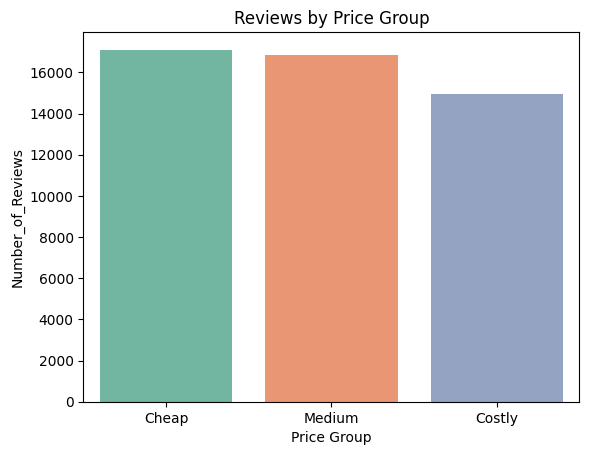

In [92]:
# Average rating per price group
rating_group = data.groupby('price_group')['number_of_reviews'].count().reset_index()
sns.barplot(x='price_group', y='number_of_reviews', data=rating_group, palette='Set2',hue = 'price_group')
plt.title('Reviews by Price Group')
plt.xlabel('Price Group')
plt.ylabel('Number_of_Reviews')
plt.show()

In [93]:
costly_ratings = data[data['price_group'] == 'Costly']['number_of_reviews']
cheap_ratings = data[data['price_group'] == 'Cheap']['number_of_reviews']
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(costly_ratings, cheap_ratings, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Costly and Cheap hotels have significantly different ratings.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings.")


T-statistic: -7.069
P-value: 0.000
Reject the null hypothesis: Costly and Cheap hotels have significantly different ratings.


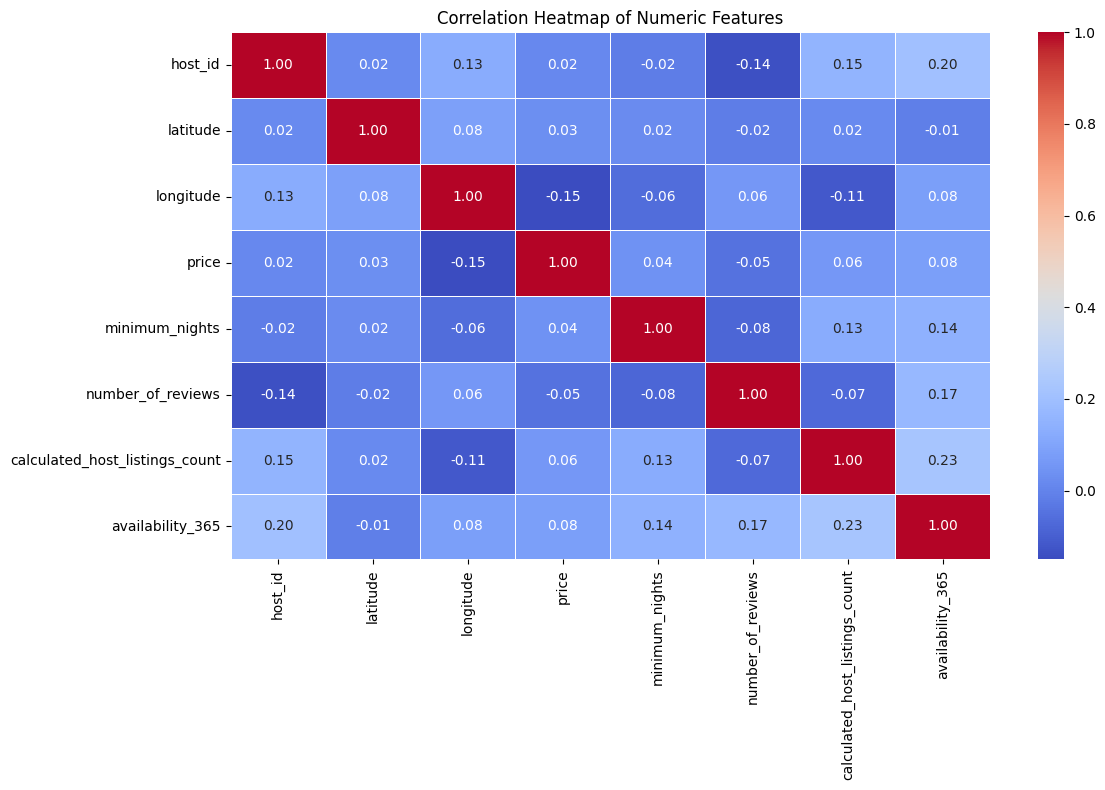

In [94]:
numeric_data = data.select_dtypes(include='number')
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [95]:
corr_matrix['price']

,price
host_id,0.015309
latitude,0.033939
longitude,-0.150019
price,1.000000
minimum_nights,0.042799
number_of_reviews,-0.047954
calculated_host_listings_count,0.057472
availability_365,0.081829


**Conclusion:**

* This analysis reveals weak correlations between price and factors like latitude, longitude, minimum nights, and host listings. No strong predictors of price were identified, indicating that other factors, such as market demand and seasonality, likely play a more significant role. Future analysis could explore additional features or employ machine learning models for better price prediction.

In [96]:
data.to_csv("cleaned_AirBnb.csv")